In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-gjwb5ol7
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-gjwb5ol7
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=a6de9e3c381ea3e47291e2bc7c5be7fb65c6f86f51ad6cb559cd7e2d9c8fd91f
  Stored in directory: /tmp/pip-ephem-wheel-cache-57xag8c9/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocess_kgptalkie as pskgp
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv')

df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df.shape

(7613, 5)

counts on tweets: 
0    4342
1    3271
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


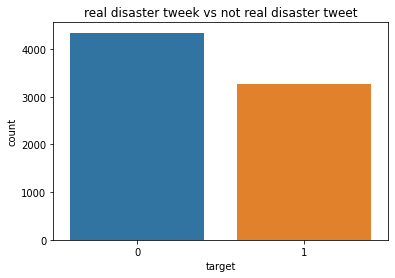

In [ ]:
print("counts on tweets: ")
print(df['target'].value_counts())

sns.countplot('target', data = df)
plt.title('real disaster tweek vs not real disaster tweet');

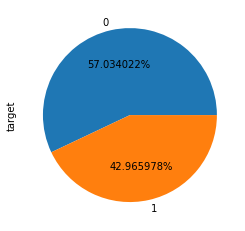

In [ ]:
df['target'].value_counts().plot.pie(autopct = '%1f%%')

In [ ]:
df_tweet = pskgp.get_basic_features(df)

df_tweet.head(3)

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0


In [ ]:
df_tweet.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'char_counts',
       'word_counts', 'avg_wordlength', 'stopwords_counts', 'hashtag_counts',
       'mentions_counts', 'digits_counts', 'uppercase_counts'],
      dtype='object')

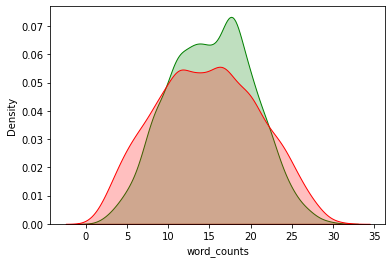

In [ ]:
sns.kdeplot(df_tweet[df_tweet['target'] == 1]['word_counts'], shade = True, color = 'green')

sns.kdeplot(df_tweet[df_tweet['target'] == 0]['word_counts'], shade = True, color = 'red')

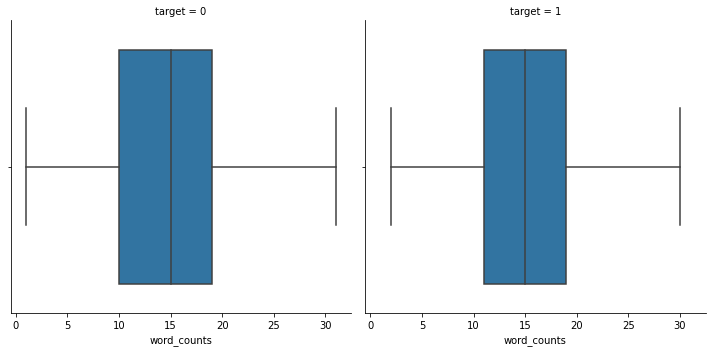

In [ ]:
sns.catplot(x = 'word_counts', data = df_tweet, kind = 'box', col = 'target')

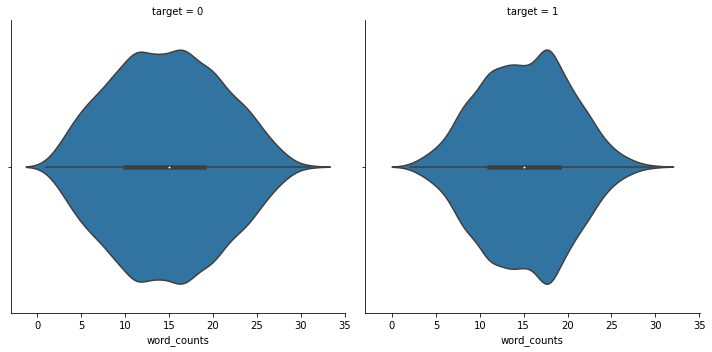

In [ ]:
sns.catplot(x = 'word_counts', data = df_tweet, kind = 'violin', col = 'target')

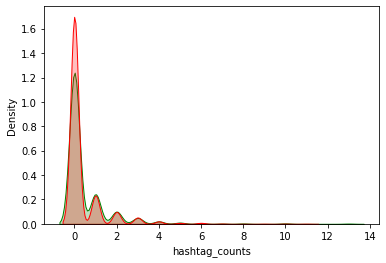

In [ ]:
sns.kdeplot(df_tweet[df_tweet['target'] == 1]['hashtag_counts'], shade = True, color = 'green')

sns.kdeplot(df_tweet[df_tweet['target'] == 0]['hashtag_counts'], shade = True, color = 'red')

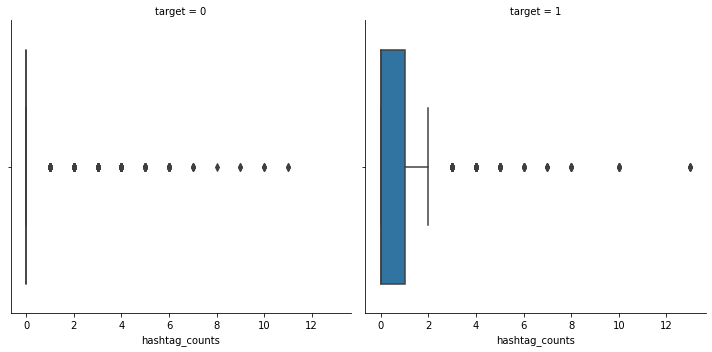

In [ ]:
sns.catplot(x = 'hashtag_counts', data = df_tweet, kind = 'box', col = 'target')

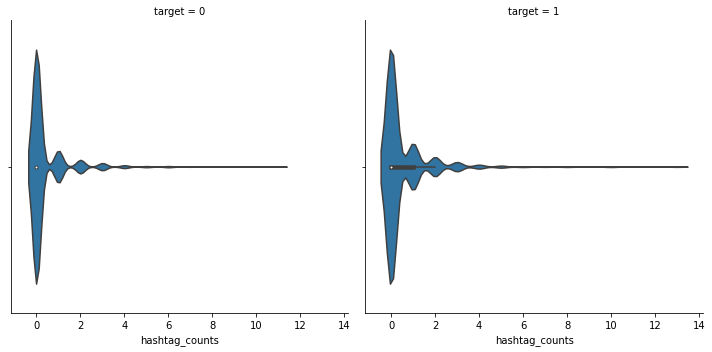

In [ ]:
sns.catplot(x = 'hashtag_counts', data = df_tweet, kind = 'violin', col = 'target')

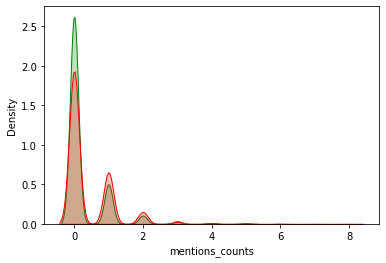

In [ ]:
sns.kdeplot(df_tweet[df_tweet['target'] == 1]['mentions_counts'], shade = True, color = 'green')

sns.kdeplot(df_tweet[df_tweet['target'] == 0]['mentions_counts'], shade = True, color = 'red')

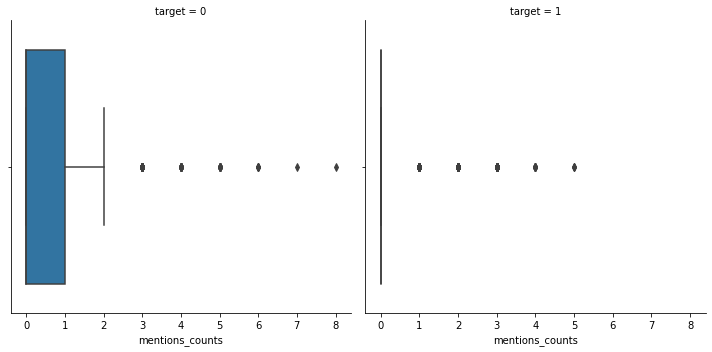

In [ ]:
sns.catplot(x = 'mentions_counts', data = df_tweet, kind = 'box', col = 'target')

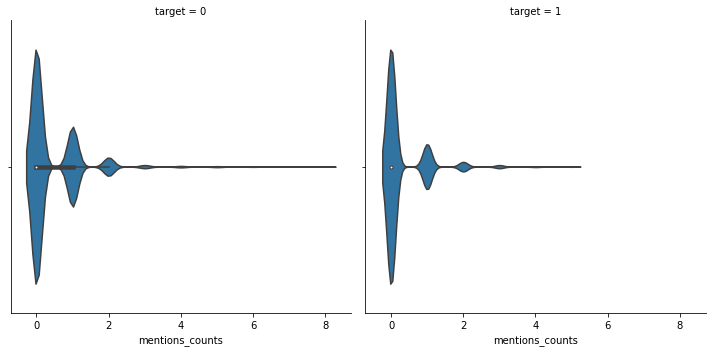

In [ ]:
sns.catplot(x = 'mentions_counts', data = df_tweet, kind = 'violin', col = 'target')

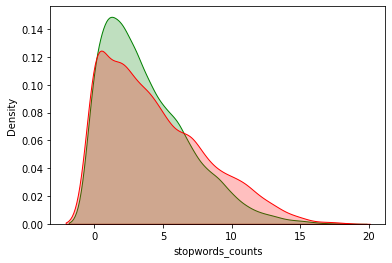

In [ ]:
sns.kdeplot(df_tweet[df_tweet['target'] == 1]['stopwords_counts'], shade = True, color = 'green')

sns.kdeplot(df_tweet[df_tweet['target'] == 0]['stopwords_counts'], shade = True, color = 'red')

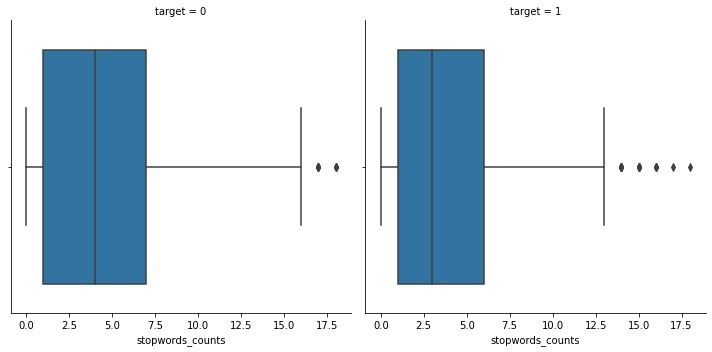

In [ ]:
sns.catplot(x = 'stopwords_counts', data = df_tweet, kind = 'box', col = 'target')

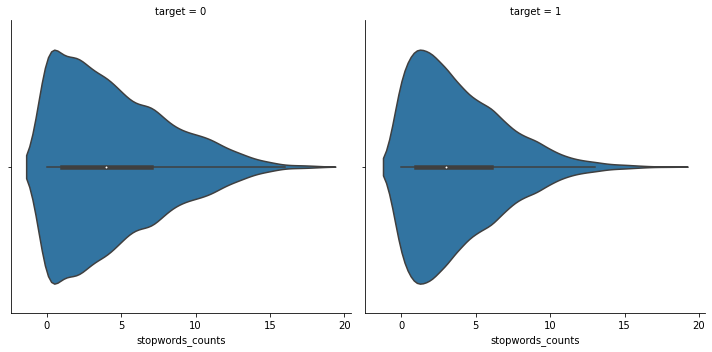

In [ ]:
sns.catplot(x = 'stopwords_counts', data = df_tweet, kind = 'violin', col = 'target')

In [ ]:
comm_tweet = pskgp.get_word_freqs(df_tweet, 'text')

top 5 common words in df: 
the    2575
a      1845
to     1805
in     1757
of     1722
dtype: int64


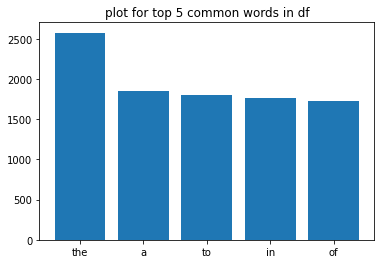

In [ ]:
comm_top = comm_tweet[0:5]

print("top 5 common words in df: ")
print(comm_top)

plt.bar(comm_top.index, comm_top.values)
plt.title('plot for top 5 common words in df');

least 5 common words in df: 
https://t.co/NlJVP3Vfyz    1
(Ft.                       1
Dix                        1
bandolier                  1
http://t.co/YmY4rSkQ3d     1
dtype: int64


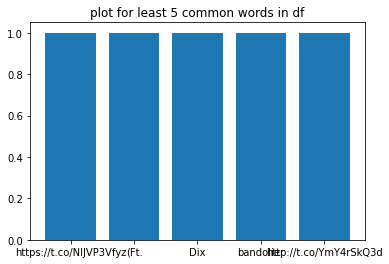

In [ ]:
comm_least = comm_tweet[-5:]

print("least 5 common words in df: ")
print(comm_least)

plt.bar(comm_least.index, comm_least.values)
plt.title('plot for least 5 common words in df');

In [ ]:
bigram_2 = pskgp.get_ngram(df_tweet, 'text', ngram_range = 2)
bigram_2[0:5]

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491)]

In [ ]:
bigram_3 = pskgp.get_ngram(df_tweet, 'text', ngram_range = 3)
bigram_3[0:5]

[('ûówe work on', 82665),
 ('ûónegligence and fireworks', 82664),
 ('ûókody vine by', 82663),
 ('ûóher upper arm', 82662),
 ('ûó wallybaiter http', 82661)]

In [ ]:
def data_clean(data):
  data = str(data).lower().replace('\\', ' ').replace('_', ' ').replace('.', ' ')
  data = pskgp.cont_exp(data)
  data = pskgp.remove_emails(data)
  data = pskgp.remove_urls(data)
  data = pskgp.remove_html_tags(data)
  data = pskgp.remove_rt(data)
  data = pskgp.remove_accented_chars(data)
  data = pskgp.remove_special_chars(data)
  data = pskgp.remove_dups_char(data)
  return data

In [ ]:
df_tweet['text'] = df_tweet['text'].apply(lambda data: data_clean(data))

df_tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [ ]:
from wordcloud import WordCloud

real_disaster = pskgp.get_word_freqs(df_tweet[df_tweet['target'] == 1], 'text')
real_disaster = ' '.join(real_disaster.index)
real_disaster

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via disaster an were be people california suicide has no police who but when been killed like do 2 will just hiroshima than so out fires storm crash families we train now about into emergency s your buildings bomb there all what two mh370 attack am nuclear they wildfire video accident get new one bombing how prime minister northern burning legionnaires dead me bomber homes some if car war still atomic obama he fatal years off may us collapse forest retweet city watch debris malaysia first today 1 japan or man latest mass severe near water had earthquake before those confirmed found oil would down 70 spill floods army world home under warning 4 could injured wreckage weather derailment outbreak 3 evacuation being saudi thunderstorm migrants 40 our old flood missing flooding can during say investigators their time bridge back mosque death suspect state her cha

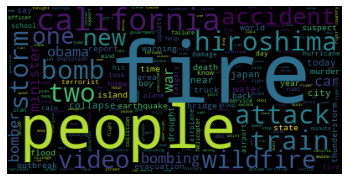

In [ ]:
word_cloud = WordCloud(max_font_size=100).generate(real_disaster)
plt.imshow(word_cloud)
plt.axis('off');

In [ ]:
not_real_disaster = pskgp.get_word_freqs(df_tweet[df_tweet['target'] == 0], 'text')
not_real_disaster = ' '.join(not_real_disaster.index)
not_real_disaster

'the httpt i a to and of is in you my it for not on that with this have be am httpst are do me out your like so by at just was but will up all he if from new as get they has or we no when now about what would an how one can there body people 2 via her been his into video more loud us love know back time why got off them emergency full see after who day 3 youtube going cannot did still some fire let good go she had want think laughing man should our ass over retweet world then way life their first youre work last too burning need make only really news than god because being many much here even best take content could help wreck him say 5 right were its black feel great today please hot every fucking 4 look im never down 1 fear cross ever before bags read top fuck oh does night bag without reddit come these everyone another getting any year death panic ruin head liked screaming bloody shit may u always smoke bad wrecked harm buildings most w coming well crash explode disaster face school

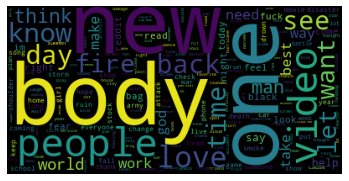

In [ ]:
word_cloud = WordCloud(max_font_size=100).generate(not_real_disaster)
plt.imshow(word_cloud)
plt.axis('off');

In [ ]:
# classification with tfidf and svm
text = df_tweet['text']
y = df_tweet['target']

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(text)

In [ ]:
x.shape, y.shape

((7613, 22545), (7613,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)

In [ ]:
def class_svm(clf, x_train, x_test, y_train, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  print()
  print('classification_report')
  print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
class_svm(clf, x_train, x_test, y_train, y_test)

classification_report


classification_report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1303
           1       0.82      0.70      0.75       981

    accuracy                           0.80      2284
   macro avg       0.81      0.79      0.80      2284
weighted avg       0.81      0.80      0.80      2284



<function sklearn.metrics._classification.classification_report>

In [ ]:
# classification with word to vector and svm

!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=c68880a6b7f3c75c9e5adf504c9712c8f5bcb566317197b7f278b937ad26c7ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-jxn0fjve/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import en_core_web_lg

In [ ]:
nlp = en_core_web_lg.load()

x = 'cat dog'
doc = nlp(x)

In [ ]:
doc.vector.shape

(300,)

In [ ]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [ ]:
df_tweet['vec'] = df_tweet['text'].apply(lambda x: get_vec(x))

In [ ]:
df_tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.26623327, 0.05843069, -0.1404636, -0.05265..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.014817425, -0.09212343, -0.10716944, -0.33..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[0.0059339865, 0.016337818, -0.105279535, -0.0..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-0.13400537, 0.25267026, 0.09032763, -0.16645..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.06394094, -0.01423019, 0.0063574947, 0.071..."


In [ ]:
x = df_tweet['vec'].to_numpy()

In [ ]:
x = x.reshape(-1, 1)

In [ ]:
x.shape

(7613, 1)

In [ ]:
x = np.concatenate(np.concatenate(x, axis = 0), axis = 0).reshape(-1, 300)

In [ ]:
x.shape

(7613, 300)

In [ ]:
y = df_tweet['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)

In [ ]:
%%time
clf = LinearSVC()
class_svm(clf, x_train, x_test, y_train, y_test)

classification_report


classification_report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1303
           1       0.80      0.72      0.76       981

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.80      2284
weighted avg       0.80      0.80      0.80      2284

CPU times: user 2.59 s, sys: 13.8 ms, total: 2.6 s
Wall time: 2.59 s
